## 2.b Non-Residential Model

In [3]:
import datetime; print(datetime.datetime.now())

2018-02-13 09:19:44.775444


**Notebook abstract**

This notebook shows the main sampling and reweighting algorithm for the non-residential sector.

### Import libraries

In [4]:
from urbanmetabolism.population.model import run_calibrated_model
from urbanmetabolism.population.model import plot_data_projection
from urbanmetabolism.population.model import TableModel

### Global variables

In [5]:
iterations = 1000
benchmark_year = 2016
census_file = 'data/benchmarks_nonresidential.csv'
typ = 'resampled'
model_name = 'Sorsogon_NonResidentialElectricity_wbias_projected_dynamic_{}'.format(typ)
verbose = False
drop_col_survey = ['n_BuildingKwh']

### Define model

In [6]:
table_model_name = 'data/table_elec_nr.csv'
estimate_var = 'NonRElectricity'
tm = TableModel(census_file = census_file, verbose=verbose)
tm.add_model(table_model_name, estimate_var, static = True)
#tm.update_dynamic_model(estimate_var, specific_col = 'BuildingKwh', static=True)

In [7]:
tm.models[estimate_var].loc[2020]

,co_mu,co_sd,p,dis,lb,ub
n_BuildingSqm,"719.587128022,312.594751517,1165.99458393,703....","45.9315047501,27.8888172966,510.591052778,206....","0.0608498641378,0.091606063041,0.0106072914917...",Deterministic;n;Categorical,NaN,NaN
n_BuildingKwh,"262,631,592,316,293,233,296,137,243","135.810529783,649.550998768,344.818792991,124....","0.0608498641378,0.091606063041,0.0106072914917...",Deterministic;BuildingSqm;Categorical,NaN,NaN


In [8]:
formula_nrb = " + ".join(["c_{0} * c_{0}".format(i) for i in tm.models[estimate_var].loc[2010].index])
tm.add_formula(formula_nrb, estimate_var)
table_model = tm.make_model()
tm.to_excel()

creating data/tableModel_NonRElectricity.xlsx


In [9]:
formula_nrb

'c_n_BuildingSqm * c_n_BuildingSqm + c_n_BuildingKwh * c_n_BuildingKwh'

### Run model

In [7]:
fw = run_calibrated_model(
    table_model,
    verbose = verbose,
    project = typ,
    census_file = census_file,
    year = benchmark_year,
    population_size = False,
    name = '{}_{}'.format(model_name, iterations),
    iterations = iterations,
    align_census = False
    #drop_col_survey = drop_col_survey
)

loop: 1/2; calibrating: NonRElectricity; sufix = loop_1


100%|██████████| 1510/1510 [00:00<00:00, 1735.45it/s]


loop: 2/2; final loop, for variables: NonRElectricity; sufix = loop_2


100%|██████████| 1510/1510 [00:01<00:00, 1478.41it/s]


Calibration Error:
	8.6702E-01  NonRElectricity
Projecting sample survey for 21 steps via resample
resampling for year 2010


100%|██████████| 1510/1510 [00:00<00:00, 2126.14it/s]


resampling for year 2011


100%|██████████| 1510/1510 [00:01<00:00, 1386.70it/s]


resampling for year 2012


100%|██████████| 1510/1510 [00:01<00:00, 1275.47it/s]


resampling for year 2013


100%|██████████| 1510/1510 [00:01<00:00, 1432.70it/s]


resampling for year 2014


100%|██████████| 1510/1510 [00:01<00:00, 1273.39it/s]


resampling for year 2015


100%|██████████| 1510/1510 [00:01<00:00, 1278.76it/s]


resampling for year 2016


100%|██████████| 1510/1510 [00:00<00:00, 1661.97it/s]


resampling for year 2017


100%|██████████| 1510/1510 [00:01<00:00, 1483.53it/s]


resampling for year 2018


100%|██████████| 1510/1510 [00:01<00:00, 1168.25it/s]


resampling for year 2019


100%|██████████| 1510/1510 [00:01<00:00, 1392.64it/s]


resampling for year 2020


100%|██████████| 1510/1510 [00:01<00:00, 1362.77it/s]


resampling for year 2021


100%|██████████| 1510/1510 [00:00<00:00, 1608.70it/s]


resampling for year 2022


100%|██████████| 1510/1510 [00:00<00:00, 1882.95it/s]


resampling for year 2023


100%|██████████| 1510/1510 [00:01<00:00, 1422.00it/s]


resampling for year 2024


100%|██████████| 1510/1510 [00:01<00:00, 1396.86it/s]


resampling for year 2025


100%|██████████| 1510/1510 [00:01<00:00, 1177.88it/s]


resampling for year 2026


100%|██████████| 1510/1510 [00:01<00:00, 1228.55it/s]


resampling for year 2027


100%|██████████| 1510/1510 [00:01<00:00, 1307.12it/s]


resampling for year 2028


100%|██████████| 1510/1510 [00:00<00:00, 1972.15it/s]


resampling for year 2029


100%|██████████| 1510/1510 [00:01<00:00, 1374.52it/s]


resampling for year 2030


100%|██████████| 1510/1510 [00:00<00:00, 1629.70it/s]


### Plot results

In [8]:
reweighted_survey = 'data/survey_{}_{}'.format(model_name, iterations)

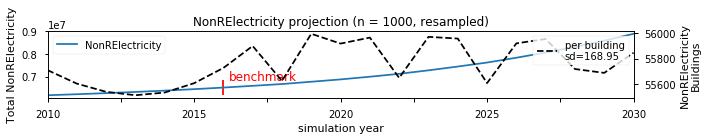

In [10]:
data = plot_data_projection(
    reweighted_survey, [estimate_var], "{}, {}".format(iterations, typ),
    benchmark_year = benchmark_year, unit = "building")

----

[UN Environment](http://www.unep.org/)

[Home](Welcome.ipynb)

[Next](Bc_GREGWT_validation_wbias.ipynb) (2.c) Model Internal Validation